In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [3]:
fraud=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\decision tree\\Fraud_Check.csv")

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Checking for null values in the data

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### There are no null values in the data

### Checking for duplicate values

In [6]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


### There are no duplicate values

### Distributions of the numerical features in the data

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

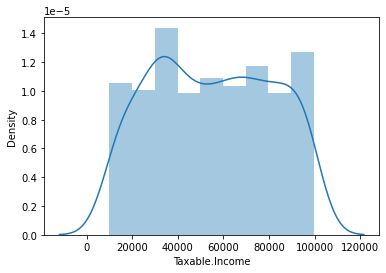

In [7]:
sns.distplot(fraud['Taxable.Income'])

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

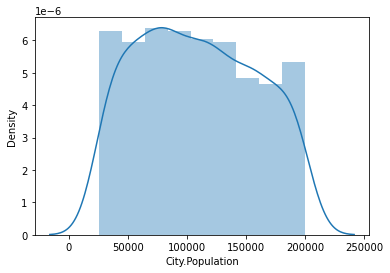

In [8]:
sns.distplot(fraud['City.Population'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

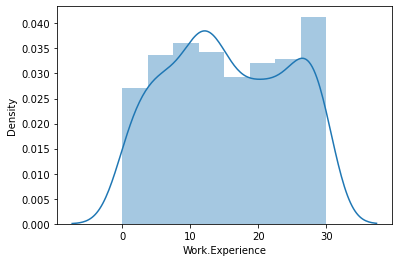

In [9]:
sns.distplot(fraud['Work.Experience'])

### Boxplots of the numerical features of the data

<AxesSubplot:xlabel='Taxable.Income'>

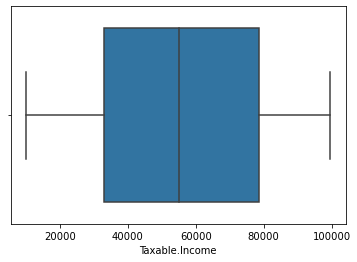

In [10]:
sns.boxplot(fraud['Taxable.Income'])

<AxesSubplot:xlabel='City.Population'>

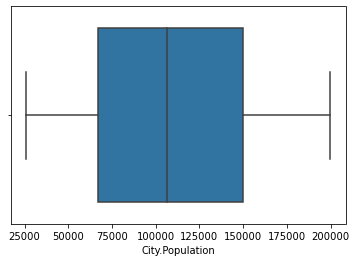

In [11]:
sns.boxplot(fraud['City.Population'])

<AxesSubplot:xlabel='Work.Experience'>

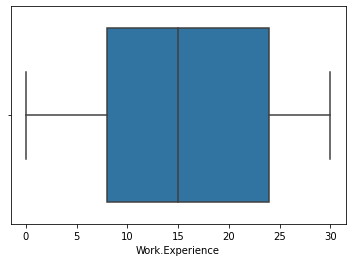

In [12]:
sns.boxplot(fraud['Work.Experience'])

### creating a new categorical column for classification

In [4]:
fraud['taxable_income_category']='risky'

In [5]:
fraud.loc[fraud['Taxable.Income']>30000,'taxable_income_category']='good'

In [6]:
fraud.taxable_income_category.value_counts()

good     476
risky    124
Name: taxable_income_category, dtype: int64

In [7]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_income_category
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


### Dropping the taxable income column

In [8]:
fraud_mod=fraud.drop(['Taxable.Income'],axis=1)

In [9]:
fraud_mod

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income_category
0,NO,Single,50047,10,YES,good
1,YES,Divorced,134075,18,YES,good
2,NO,Married,160205,30,YES,good
3,YES,Single,193264,15,YES,good
4,NO,Married,27533,28,NO,good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,good
596,YES,Divorced,55369,2,YES,good
597,NO,Divorced,154058,0,YES,good
598,YES,Married,180083,17,NO,good


### Using label encoder

In [10]:
le=preprocessing.LabelEncoder()
fraud_mod['Undergrad']=le.fit_transform(fraud_mod['Undergrad'])
fraud_mod['Marital.Status']=le.fit_transform(fraud_mod['Marital.Status'])
fraud_mod['taxable_income_category']=le.fit_transform(fraud_mod['taxable_income_category'])
fraud_mod['Urban']=le.fit_transform(fraud_mod['Urban'])

In [11]:
fraud_mod

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


### Splitting independant and dependant variables

In [12]:
x=fraud_mod.iloc[:,:-1]
y=fraud_mod.iloc[:,-1]

In [13]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_income_category, Length: 600, dtype: int32

### Splitting into train and test data for validation

In [15]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)


### Building model with a max depth of 3

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Plotting the decision tree

[Text(0.5, 0.875, 'X[2] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(0.3, 0.625, 'X[3] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(0.2, 0.375, 'X[2] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(0.1, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(0.3, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.7, 0.625, 'X[2] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'X[2] <= 130296.0\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]'),
 Text(0.7, 0.125, 'entropy = 0.813\nsamples = 203\nvalue = [152, 51]'),
 Text(0.9, 0.125, 'entropy = 0.675\nsamples = 169\nvalue = [139, 30]')]

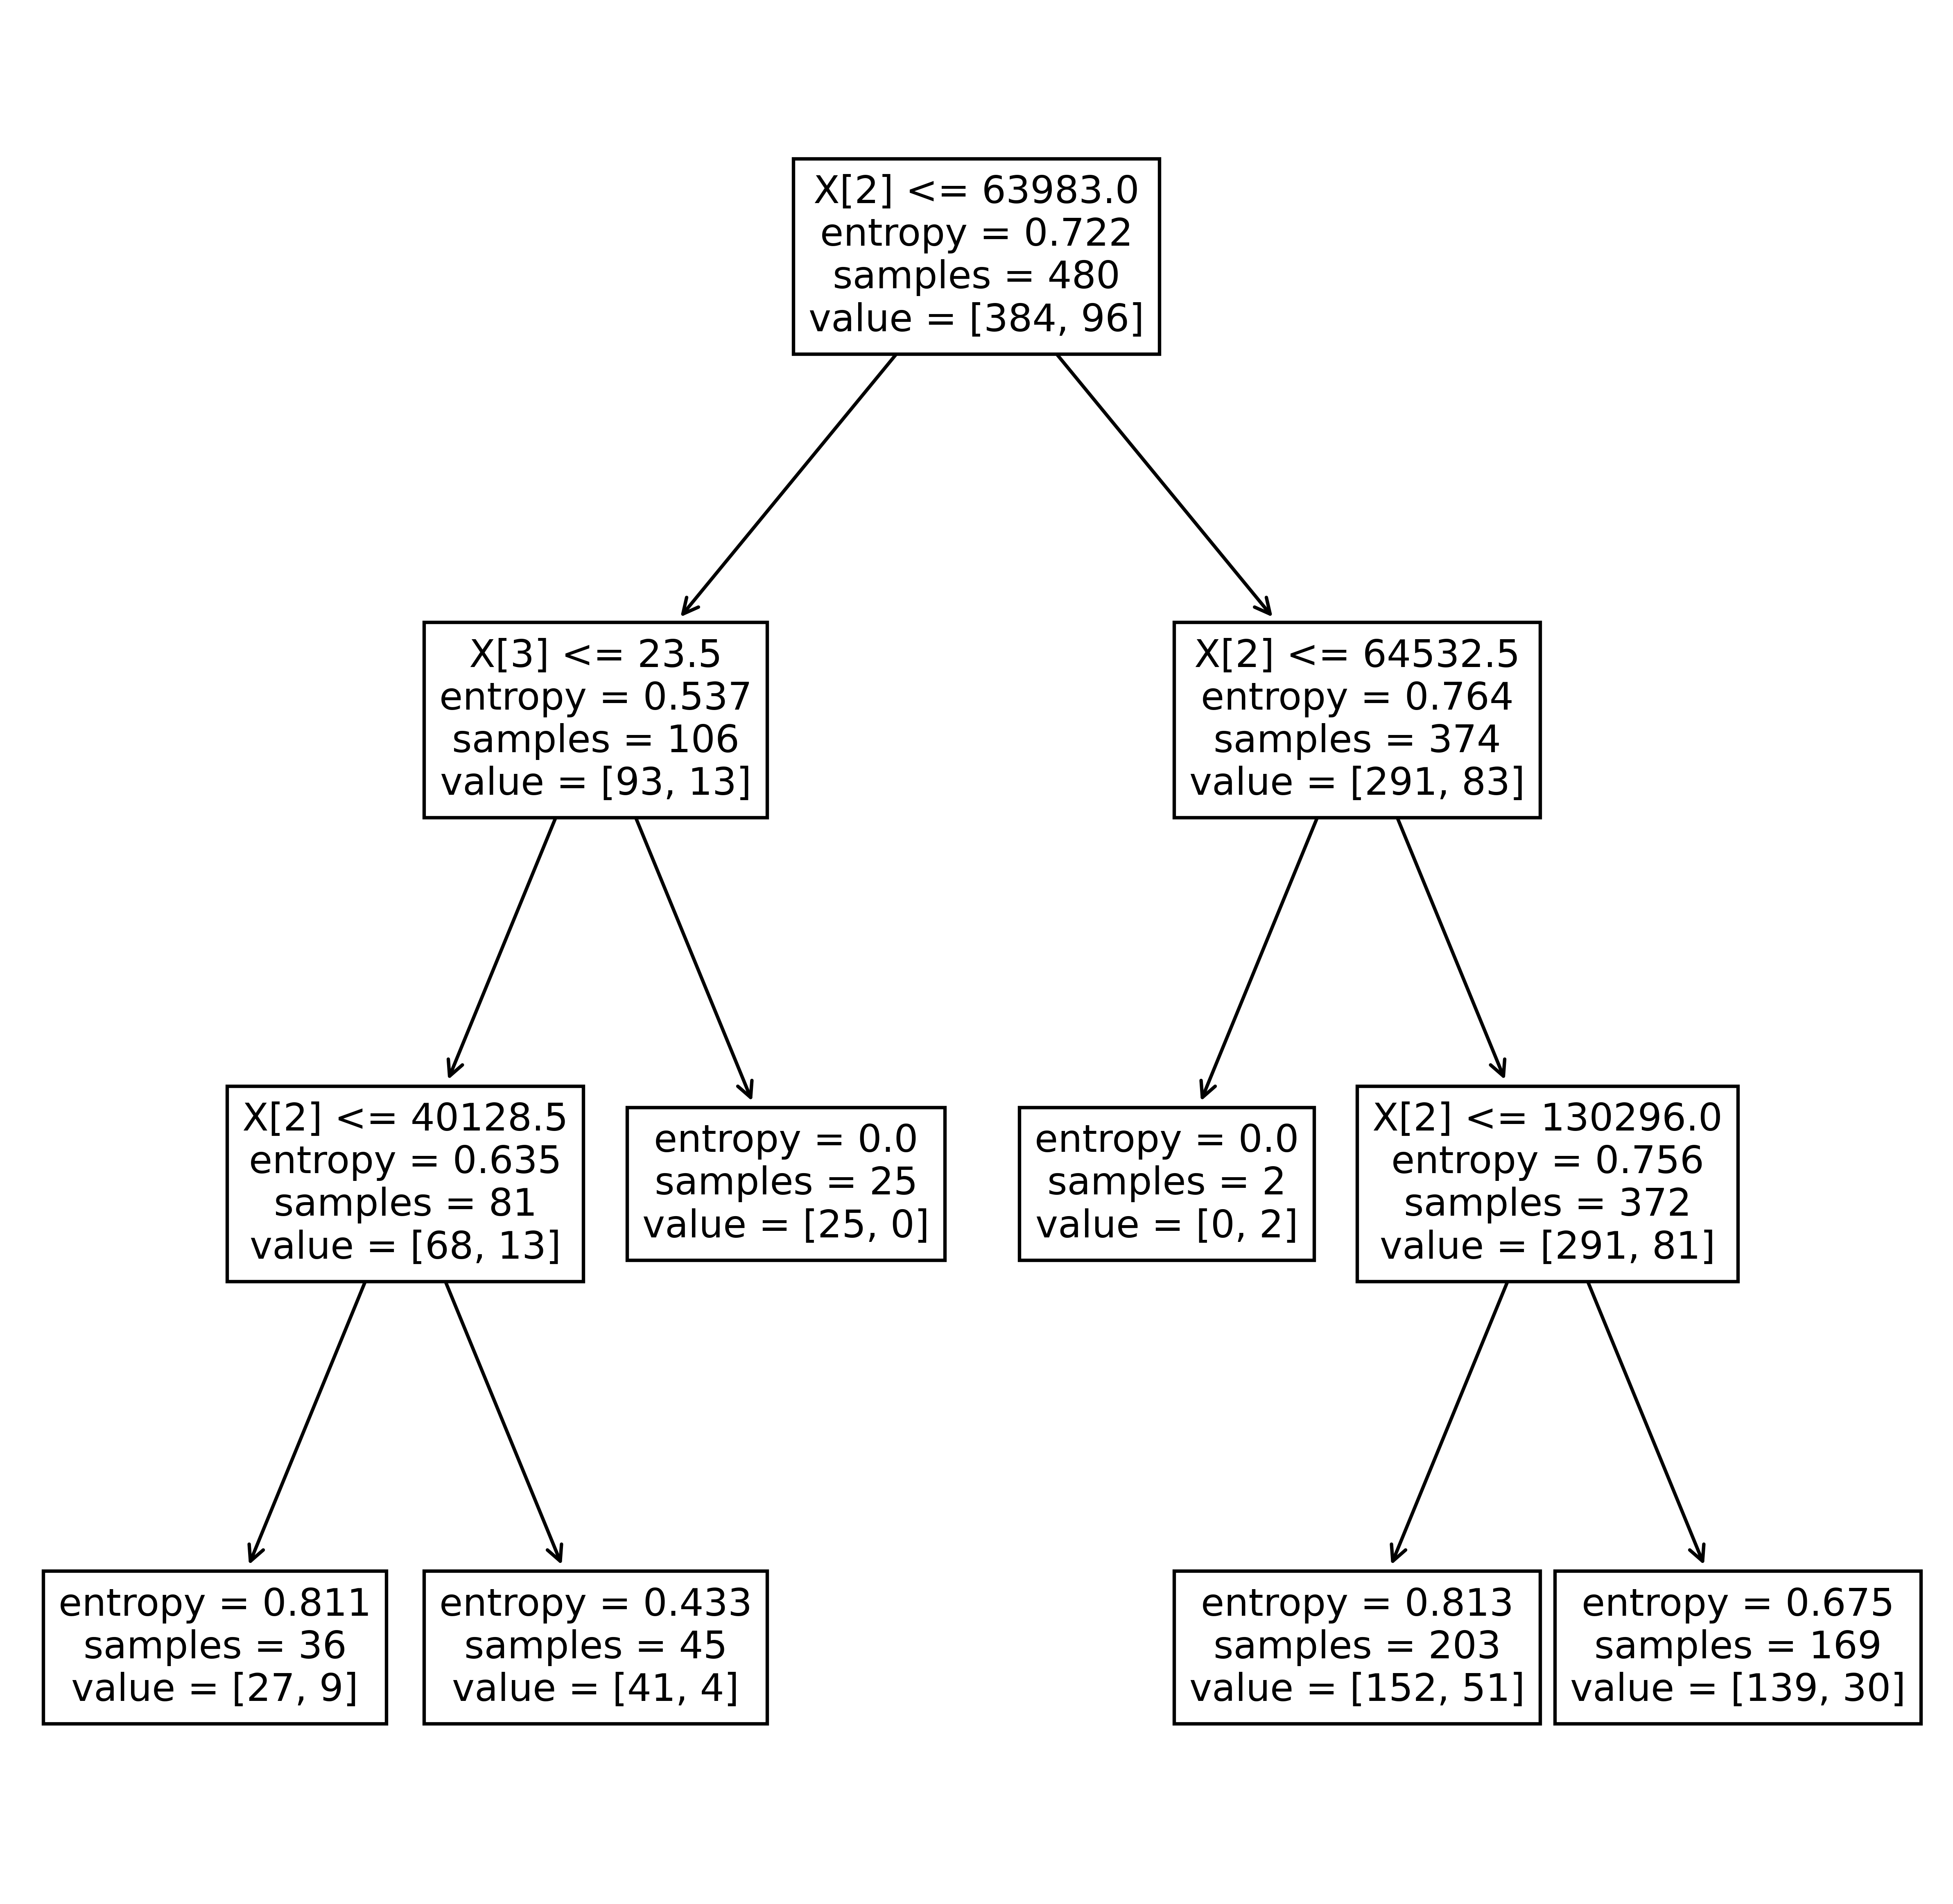

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(model)

### Predicting with the test data

In [18]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    120
dtype: int64

In [19]:
np.mean(preds==y_test)

0.7666666666666667

In [20]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



In [21]:
confusion_matrix(y_test,preds)

array([[92,  0],
       [28,  0]], dtype=int64)

### The classifier is not very good as it classifies every data points to one class. The accuracy doesnt reflect the effectiveness of the model

### The model doesn't classify any data as positive

### Trying different max depth to find a better model

In [22]:
max_depth=[]
accuracy=[]
for i in range(1,11):
    
    model = DecisionTreeClassifier(criterion = 'entropy',max_depth=i)
    model.fit(x_train,y_train)
    preds = model.predict(x_test) 
    accuracy.append(np.mean(preds==y_test))
    max_depth.append(i)
print(np.max(accuracy),max_depth[accuracy.index(np.max(accuracy))])

0.775 5


### The model with the accuracy is at a max depth of 5

[Text(0.5208333333333334, 0.9166666666666666, 'X[2] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(0.3125, 0.75, 'X[3] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(0.2708333333333333, 0.5833333333333334, 'X[2] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(0.16666666666666666, 0.4166666666666667, 'X[4] <= 0.5\nentropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(0.08333333333333333, 0.25, 'X[2] <= 36940.0\nentropy = 0.964\nsamples = 18\nvalue = [11, 7]'),
 Text(0.041666666666666664, 0.08333333333333333, 'entropy = 0.779\nsamples = 13\nvalue = [10, 3]'),
 Text(0.125, 0.08333333333333333, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.25, 0.25, 'X[2] <= 31494.0\nentropy = 0.503\nsamples = 18\nvalue = [16, 2]'),
 Text(0.20833333333333334, 0.08333333333333333, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.2916666666666667, 0.08333333333333333, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0

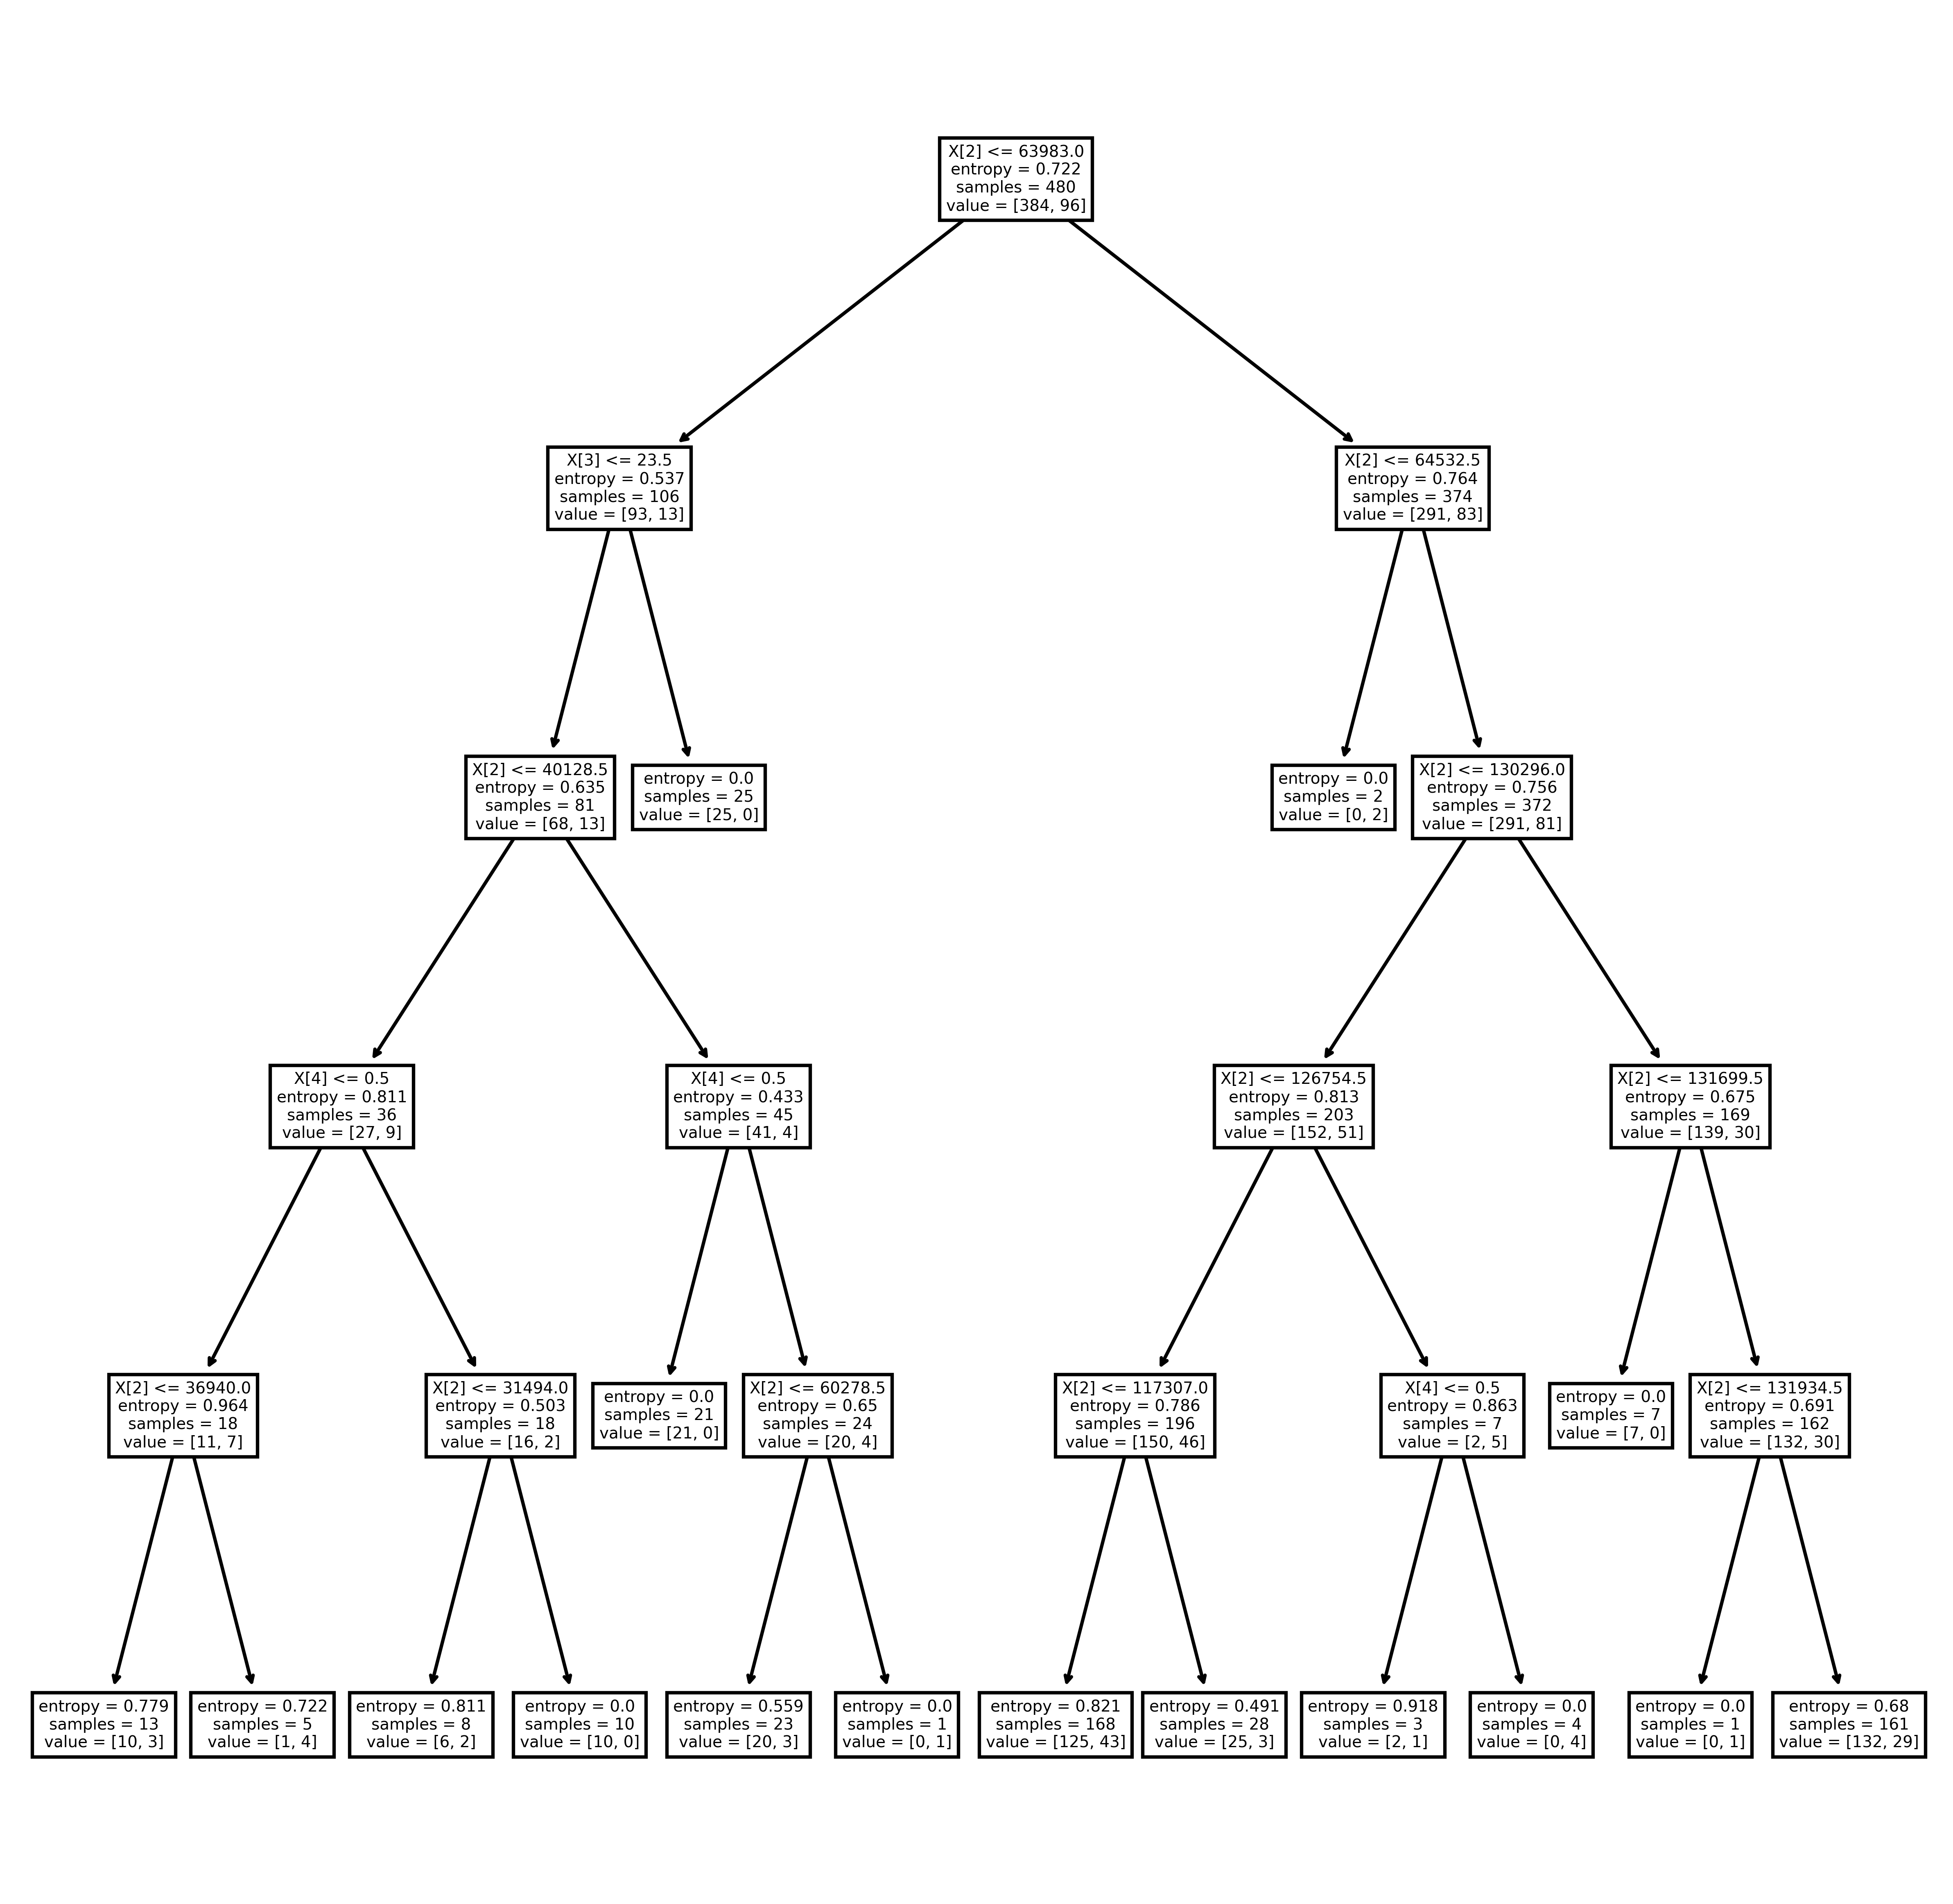

In [23]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(model)

In [24]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    117
1      3
dtype: int64

In [25]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        92
           1       0.67      0.07      0.13        28

    accuracy                           0.78       120
   macro avg       0.72      0.53      0.50       120
weighted avg       0.75      0.78      0.70       120



In [26]:
m=confusion_matrix(y_test,preds)
m

array([[91,  1],
       [26,  2]], dtype=int64)

### This model also has a very low recall and precision

### Trying to find a max depth which will yield a model of higher recall value

In [27]:
max_depth=[]
accuracy=[]
for i in range(1,11):
    
    model = DecisionTreeClassifier(criterion = 'entropy',max_depth=i)
    model.fit(x_train,y_train)
    preds = model.predict(x_test) 
    c=confusion_matrix(y_test,preds)
    if c[1,1]+c[1,0]>0:
        recall=c[1,1]/(c[1,1]+c[1,0])
    else:
        recall=0
    accuracy.append(np.mean(recall))
    max_depth.append(i)
print(np.max(accuracy),max_depth[accuracy.index(np.max(accuracy))])

0.07142857142857142 5


### The previous model with 5 max depth has the highest recall value of 7%